In [5]:
# Notebook header <--- Always run this cell first!
import os, json
import ruamel.yaml as yaml
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from monty.json import MontyDecoder, MontyEncoder
from ipywidgets import SelectMultiple, FloatSlider, FloatRangeSlider, SelectionSlider, Combobox
from ipywidgets import interact, fixed, jslink
from pymatgen.electronic_structure.plotter import DosPlotter
from quotas.core import QuotasCalculator

data_dir = "/mnt/data/mbercx/quotas"

In [6]:
# Load the dictionary of all the structures for which we have calculated the required properties
with open("../yield.json", "r") as file:
    yield_dict = json.loads(file.read(), cls=MontyDecoder)


## Periodic Table

In [17]:
from pymatgen.util.plotting import periodic_table_heatmap

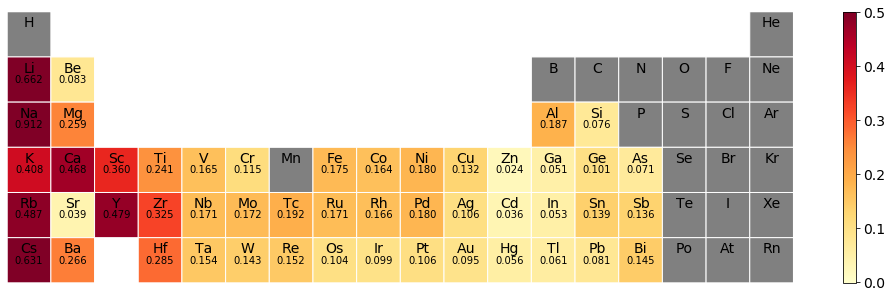

In [29]:
periodic_table_heatmap(He_yield_dict, max_row=6, cmap_range=[0, 0.5], value_format="%.3f")
fig = plt.gcf()
fig.set_size_inches((14,4))

In [15]:
def get_element_average(element, ion):
    
    average_yield = 0
    
    try:
        surfaces = [k for k in yield_dict[element].keys()]

        for surface in surfaces:
            print(yield_dict[element][surface][ion]["total_yield"])
            average_yield += yield_dict[element][surface][ion]["total_yield"]
            
        return average_yield / len(surfaces)
    
    except KeyError:
        
        if element == "Cr":
            phases = ['Cr_afm', 'Cr_nm']
        
        if element == "Fe":
            phases = ['Fe_alpha', 'Fe_gamma']
                
        elif element == "Hg":
            phases = ['Hg_alpha', 'Hg_beta']
                
        elif element == "Sn":
            phases = ['Sn_alpha', 'Sn_beta']
                
        for phase in phases:
            surfaces = [k for k in yield_dict[phase].keys()]

            for surface in surfaces:
                print(yield_dict[phase][surface][ion]["total_yield"])
                average_yield += yield_dict[phase][surface][ion]["total_yield"]
                
        return average_yield / len(surfaces) / len(phases)

In [16]:
l = [el for el in yield_dict.keys() if not len(el) > 2]
l.extend(["Cr", "Fe", "Hg", "Sn"])
He_yield_dict = {e: get_element_average(e, "He") for e in l}

0.10670172399513041
0.11174342282158076
0.10049203760431613
0.1756467673882923
0.19404741241053872
0.19226043997843606
0.0749074497768669
0.07385844635305762
0.06306912222468809
0.09264608403177108
0.09507899140375008
0.09594126305389078
0.33051636441542415
0.30588849388628514
0.16051044319037414
0.04849077203694818
0.08310848624324206
0.1170633470044217
0.15087796962467617
0.14322709211368279
0.14120224562494546
0.4542348716345732
0.49031910717086624
0.45843385656831176
0.03405634172003602
0.034174078190751064
0.03840024232875415
0.1477911013607364
0.16013200992263668
0.18535779518990297
0.6520406119912467
0.587688004655472
0.6546490799627547
0.13482009279140728
0.14038495578645768
0.12122854827527044
0.06176413288660534
0.041682459981126546
0.05026788550627265
0.10373098407188941
0.10850954171815093
0.09174964452458122
0.20190840723013867
0.2542174040725581
0.3984391702226407
0.05017034149629954
0.057609373570354484
0.04982623706529435
0.08803090602479136
0.1209566484735774
0.0877012